# Imports

In [1]:
from src.data_analysis.DataManipulation import DataManipulation
from src.data_analysis.Report import Report
from src.data_analysis.Prices import Prices
from src.TradeLogic import TradeLogic
from src.Backtest import Backtest
import seaborn
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

# Market Data prepare

In [2]:
symbol='PETR4.SA'
dm = DataManipulation()
px = Prices()
df_ohlc = dm.get_symbol_ohlc_df(symbol,'TIMEFRAME_D1',1000000000000)
df=df_ohlc.values

Connect Sucessfully (500, 4040, '20 Oct 2023')


In [3]:
# px.general_report(df_ohlc)

In [4]:
# _=px.monte_carlo_simulation(df_ohlc, 1, 252, 100000)

# Backtest

In [5]:
tl = TradeLogic(100,stop_loss=5,take_profit=15)
bt = Backtest(symbol,df,tl,limit_history=100)
trades=bt.run()


Initializing backtest

Skipping 2013-11-04 00:00:00 due to history lack of data.

Finish backtest



# Report

In [6]:
bt.get_report_pointer().get_backtest_results()

{'total_trades': 41,
 'total_bought': 21,
 'total_sold': 20,
 'gross_profit': 4470.137405395508,
 'gross_loss': -2933.620810508728,
 'qty_profit': 27,
 'qty_loss': 14,
 'qty_none': 0,
 'profit_trades_perc': 65.85365853658537,
 'profit_factor': 1.5237611450609827,
 'max_winner_result': 944.3329811096191,
 'max_loss_result': -1551.104736328125,
 'average_profit': 165.56064464427806,
 'average_loss': -209.54434360776628,
 'max_drawdown': 1551.104736328125,
 'returns': 1536.5165948867798,
 'perc_returns': 99.05949990998808}


					Trading PETR4.SA backtest:

Gross profit: 			 4470.14			Winner trades:  27
Gross loss: 			 -2934.0			Losing trades:  14
Largest profit trade: 		 944.33				Largest loss trade:  -1551.1
Average profit trade: 		 165.56				
Profit trades (% of total): 	 65.85 %

Profit factor: 			 1.52
Average loss trade:  -209.54
Profit/Loss: 			 0.79
Total Net profit: 		 1536.52
Percentual return: 		 99.06 %

Number of trades: 		 41
Number of bought trades: 	 21
Number of sold trades: 		 20 

Balance Drawdown Maximal: 	 1551.1
Balance Drawdown Maximal Time Range: 2023-03-21 00:00:00  until  2023-04-26 00:00:00


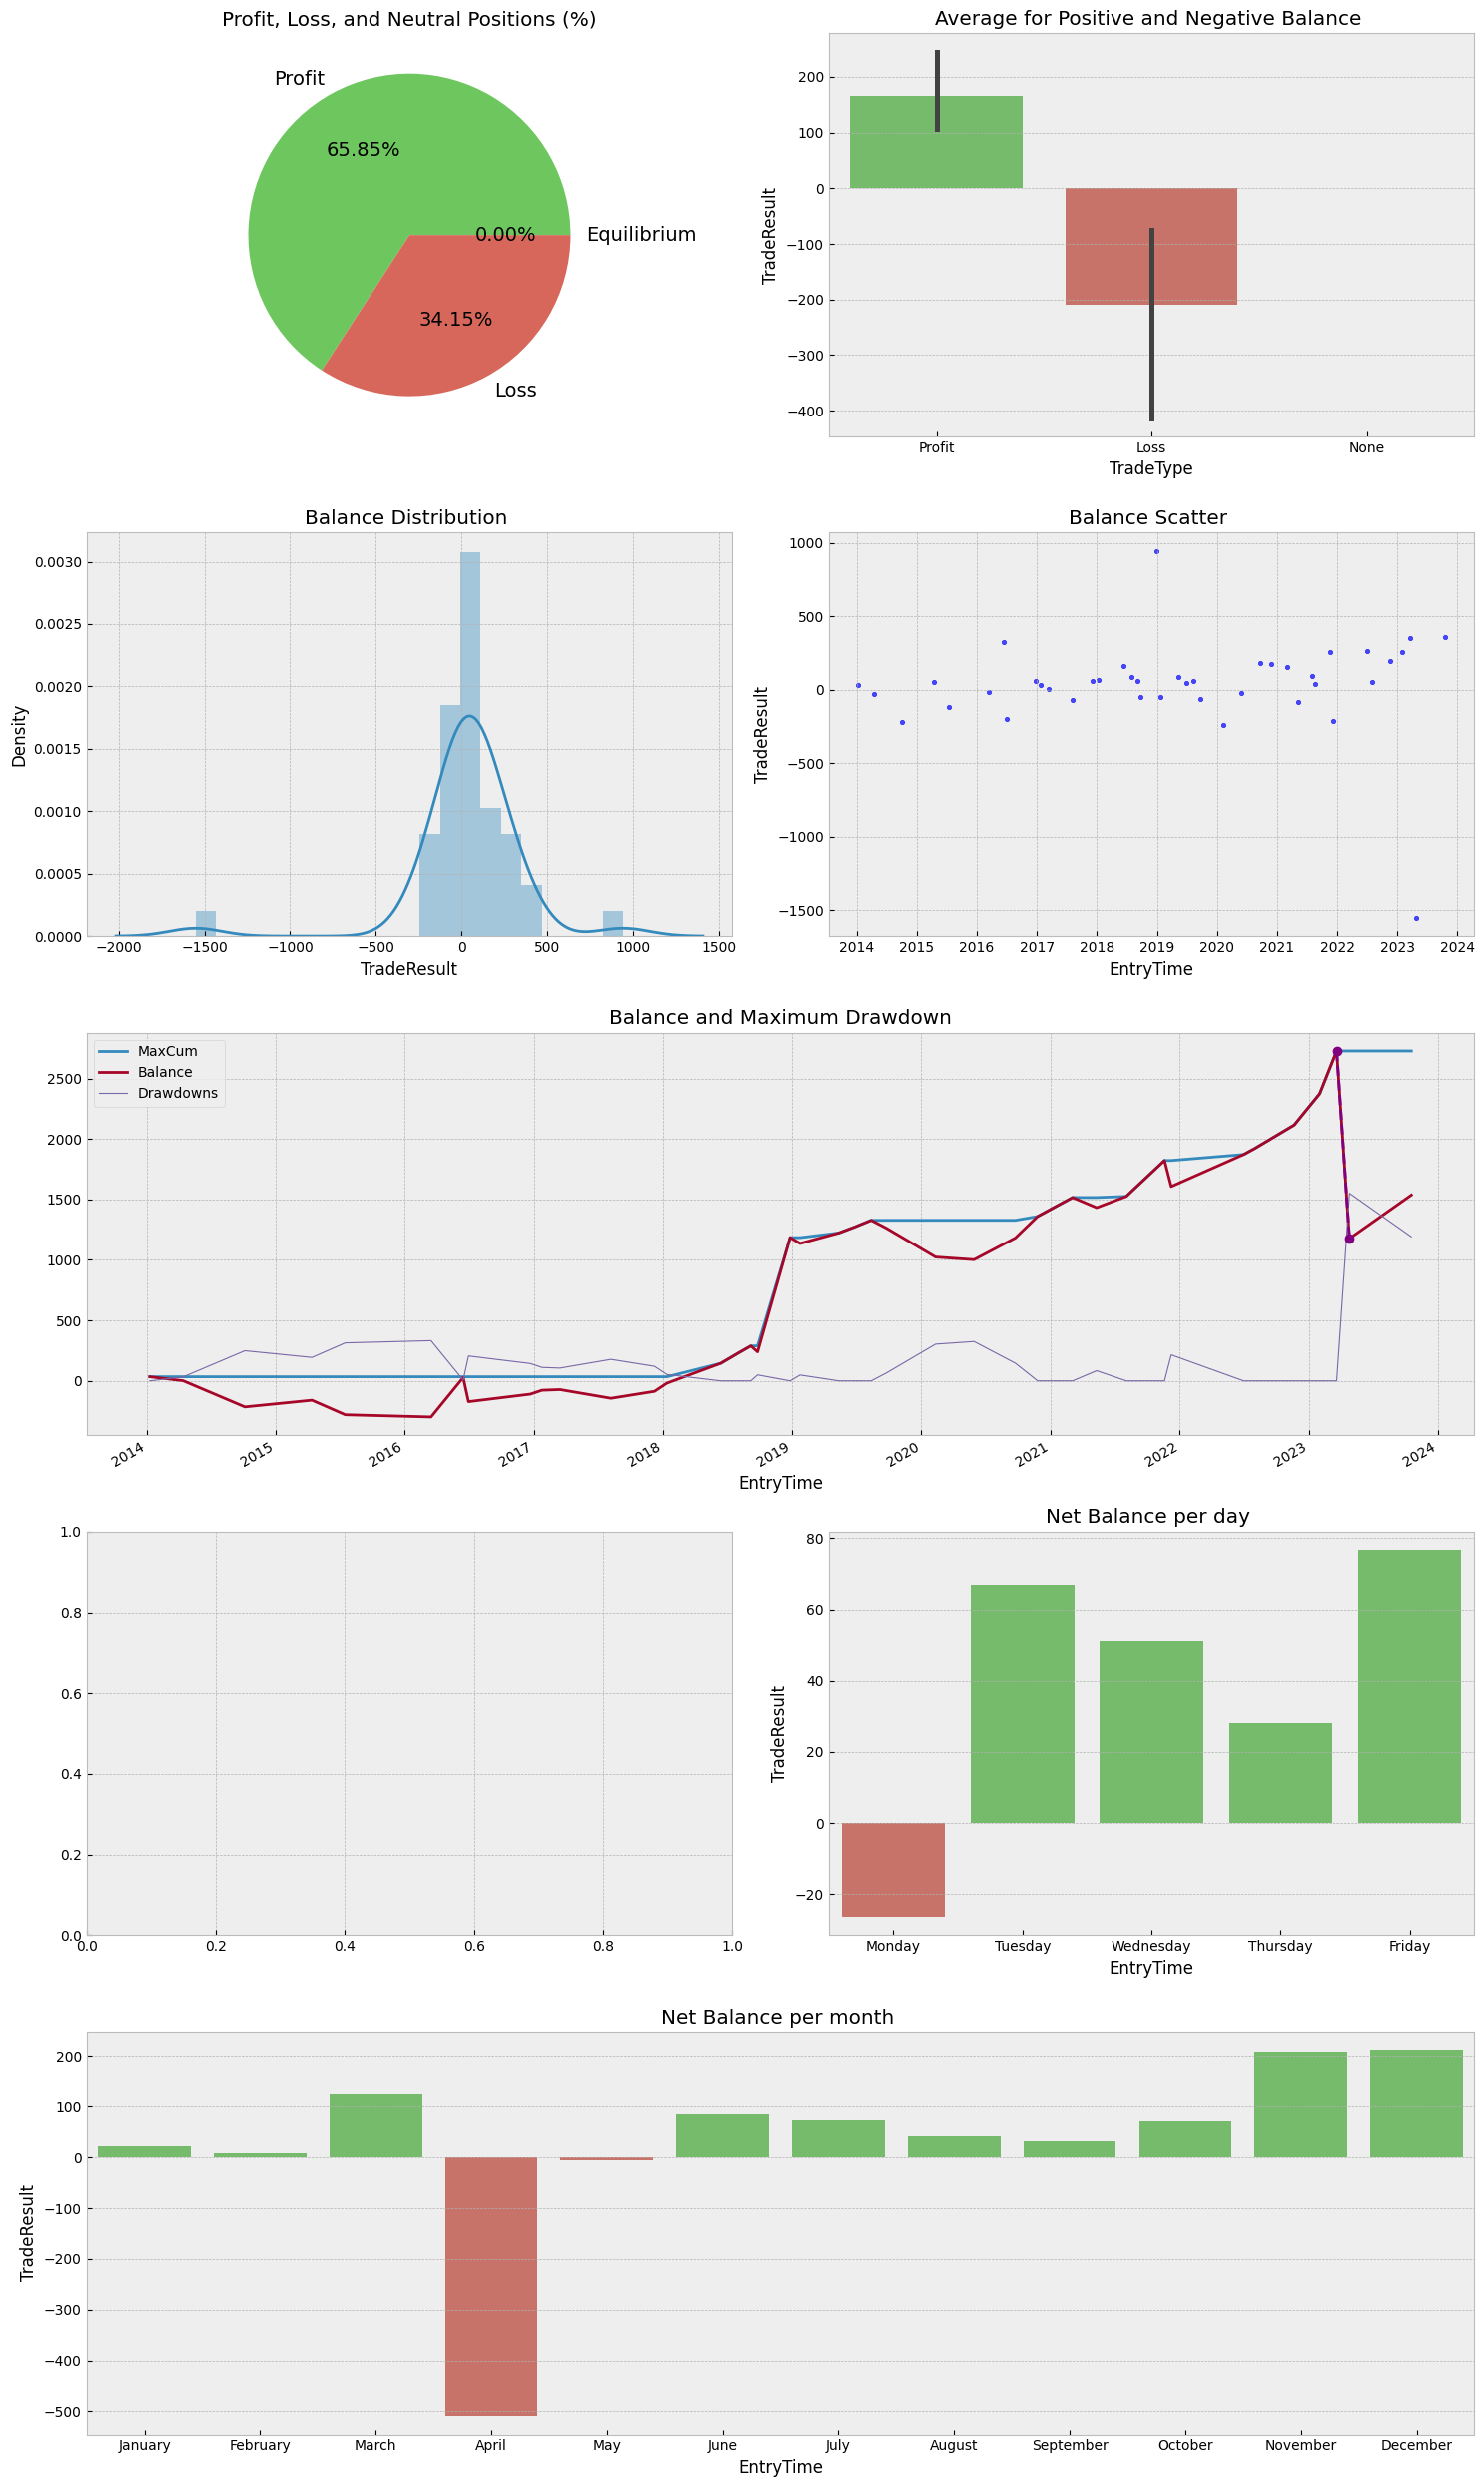

In [7]:
bt.get_report_pointer().plot_report()